<a href="https://colab.research.google.com/github/SoroushJamali/generate_new_apple_GAN/blob/main/Gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q imageio



In [ ]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 992 kB 5.5 MB/s 


In [ ]:
import visualkeras


In [ ]:
pip install keras_sequential_ascii

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for keras-sequential-ascii: filename=keras_sequential_ascii-0.1.1-py3-none-any.whl size=3063 sha256=668dc3c8719fa8b3cdc93f6e12794383a613420cefdd163621fc87e743a495ae
  Stored in directory: /root/.cache/pip/wheels/4e/99/75/8910ced4b40e8c20088c237fa706b32ac758321482ae2659e3
Successfully built keras-sequential-ascii


In [ ]:

from keras_sequential_ascii import keras2ascii

In [ ]:
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf


import glob
import imageio
import matplotlib.pyplot as plt
import matplotlib.image as mpimgI
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from IPython import display
from google.colab import drive



In [ ]:
from PIL import Image
import cv2
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
dataset = []
DATADIR = '/content/gdrive/MyDrive'
CATEGORIES = ["data"]
def create_traning_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
      img_array = Image.open(os.path.join(path,img))
      new_array = cv2.resize(np.asarray (img_array),(80,80))
      dataset.append((np.asarray (new_array) -127.5) /127.5)

create_traning_data()

In [ ]:
BATCH_SIZE = 10

BUFFER_SIZE = 6000

train_dataset= tf.data. Dataset.from_tensor_slices (dataset).shuffle (BUFFER_SIZE) .batch (BATCH_SIZE)

In [ ]:
#generator

def make_generator_model():
  model= tf.keras.Sequential () 
  model.add (layers.Dense (5*5*160, use_bias=False, input_shape=(150,)))
  model.add(layers.BatchNormalization ()) 
  model.add(layers.LeakyReLU ())

  model.add (layers.Reshape ((5, 5, 160)))
  assert model.output_shape== (None, 5, 5, 160)

  model.add (layers.Conv2DTranspose (80, (3, 3), strides=(2,2), padding='same', use_bias=False)) 
  assert model.output_shape ==(None, 10, 10, 80)
  model.add(layers.BatchNormalization ())
  model.add(layers.LeakyReLU ())

  model.add (layers.Conv2DTranspose (40, (3, 3), strides=(2,2), padding='same', use_bias=False ))
  assert model.output_shape==(None, 20, 20, 40) 
  model.add (layers.BatchNormalization ())
  model.add (layers. LeakyReLU ())

  model.add (layers.Conv2DTranspose (20, (3,3), strides=(2, 2), padding='same', use_bias=False ))
  assert model.output_shape ==(None, 40, 40, 20) 
  model.add (layers.BatchNormalization ())
  model.add (layers. LeakyReLU () ) 

  model.add (layers.Conv2DTranspose (10, (3,3), strides=(2,2), padding='same', use_bias=False ))
  assert model.output_shape ==(None, 80, 80, 10) 
  model.add (layers.BatchNormalization ()) 
  model.add (layers.LeakyReLU ())

  model.add(layers.Conv2DTranspose (3, (3, 3), strides=(1,1), padding='same',  use_bias=False ))
  assert model.output_shape ==(None, 80, 80,3)

  return model

gen=make_generator_model ()



In [ ]:
keras2ascii(gen)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####         150
               Dense   XXXXX -------------------    600000    77.9%
                       #####        4000
  BatchNormalization    μ|σ  -------------------     16000     2.1%
                       #####        4000
           LeakyReLU   ????? -------------------         0     0.0%
                       #####        4000
             Reshape     |   -------------------         0     0.0%
                       #####      5    5  160
     Conv2DTranspose    /|\  -------------------    115200    15.0%
                       #####     10   10   80
  BatchNormalization    μ|σ  -------------------       320     0.0%
                       #####     10   10   80
           LeakyReLU   ????? -------------------         0     0.0%
                       #####     10   10   80
     Conv2DTranspose    /|\  -------------------     28800     3.7%
                       #####     2

In [ ]:
print(gen.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4000)              600000    
                                                                 
 batch_normalization (BatchN  (None, 4000)             16000     
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 4000)              0         
                                                                 
 reshape (Reshape)           (None, 5, 5, 160)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 10, 10, 80)       115200    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 10, 10, 80)       3

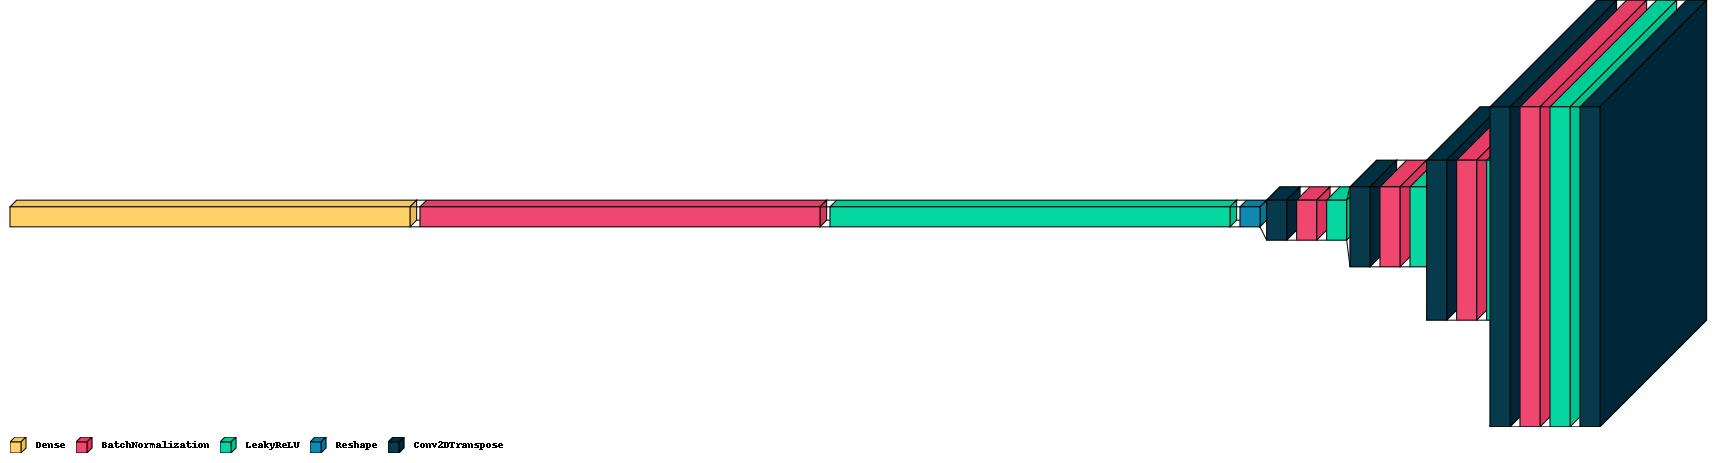

In [ ]:
visualkeras.layered_view(gen,legend=True, draw_volume=True)

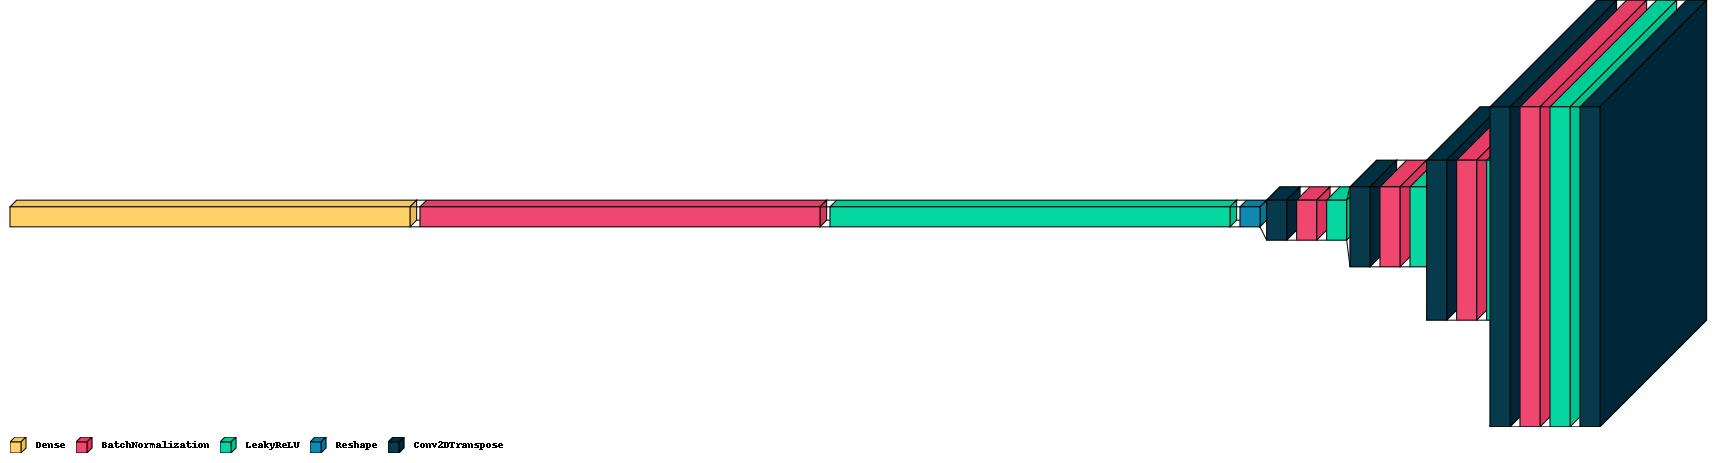

In [ ]:
visualkeras.layered_view(gen, legend=True) # without custom font
from PIL import ImageFont

visualkeras.layered_view(gen, legend=True) # selected font

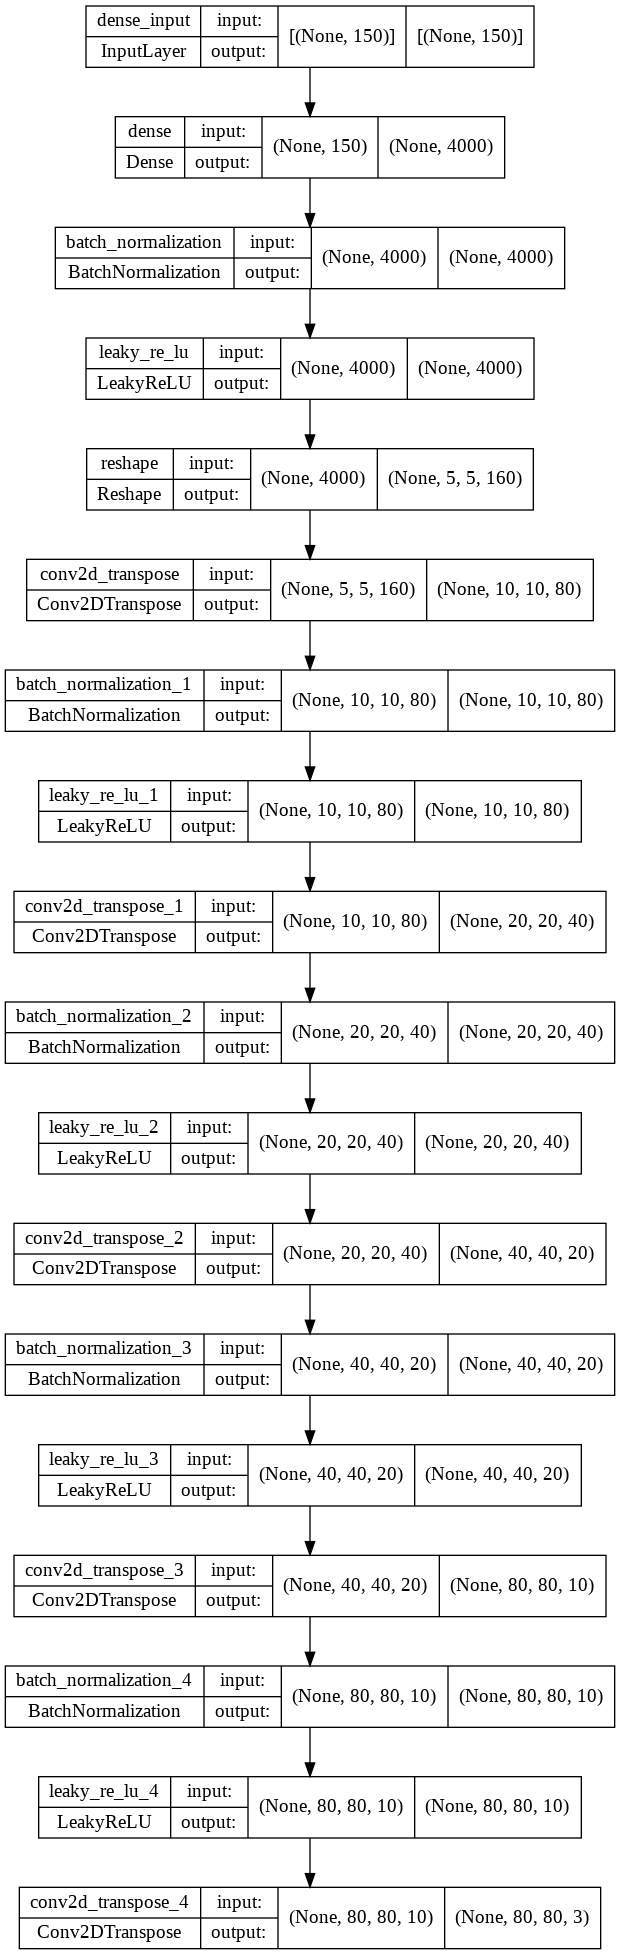

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(gen, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
def make_discriminator_model ():

  model= tf.keras.Sequential ()
  model.add(layers.Conv2D(10, (3, 3), strides=(2, 2), padding='same', input_shape=[80, 80, 3]))
  model.add(layers.LeakyReLU ()) 
  model.add (layers.Dropout (0.3))

  model.add (layers.Conv2D (20, (3, 3), strides=(2, 2), padding='same'))
  model.add (layers.LeakyReLU())
  model.add (layers. Dropout (0.3))

  model.add (layers.Conv2D (40, (3, 3), strides=(2, 2), padding='same'))
  model.add (layers.LeakyReLU ())
  model.add (layers.Dropout (0.3))

  model.add (layers.Conv2D (80, (3, 3), strides=(2, 2), padding='same')) 
  model.add(layers.LeakyReLU () )
  model.add (layers.Dropout (0.3))
  model.add (layers.Flatten())
  model.add(layers.Dense (10))
  model.add(layers.Dense (1))
  return model

dscrm = make_discriminator_model()

In [ ]:
pip install keras_sequential_ascii

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
keras2ascii(dscrm)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####     80   80    3
              Conv2D    \|/  -------------------       280     0.5%
                       #####     40   40   10
           LeakyReLU   ????? -------------------         0     0.0%
                       #####     40   40   10
             Dropout    | || -------------------         0     0.0%
                       #####     40   40   10
              Conv2D    \|/  -------------------      1820     3.1%
                       #####     20   20   20
           LeakyReLU   ????? -------------------         0     0.0%
                       #####     20   20   20
             Dropout    | || -------------------         0     0.0%
                       #####     20   20   20
              Conv2D    \|/  -------------------      7240    12.4%
                       #####     10   10   40
           LeakyReLU   ????? -------------------         0     0.0%
              

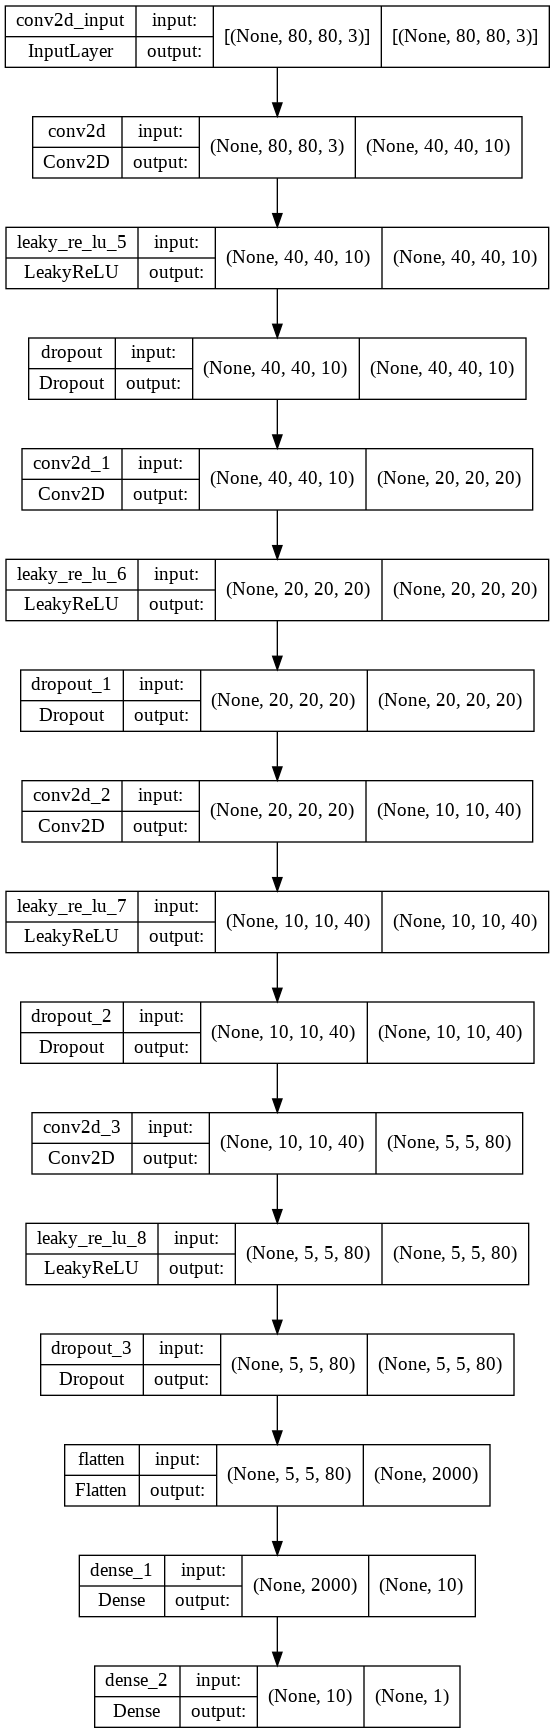

In [ ]:
plot_model(dscrm, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

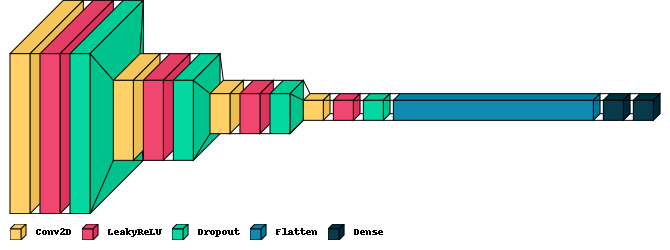

In [ ]:

visualkeras.layered_view(dscrm, legend=True) # selected font

In [ ]:
#define Loss 
cross_entropy=tf.keras.losses.BinaryCrossentropy (from_logits=True)

#discriminator_loss

def discriminator_loss (real_output, fake_output):

  real_loss =cross_entropy (tf.ones_like (real_output), real_output)
  fake_loss=cross_entropy (tf.zeros_like (fake_output), fake_output)
  total_loss=real_loss + fake_loss
  return total_loss

#generator_loss

def generator_loss (fake_output):
  return cross_entropy (tf.ones_like (fake_output), fake_output)

In [ ]:
#define optimizaion
generator_optimizer = tf.keras.optimizers.Adam (1e-4) 
discriminator_optimizer = tf.keras. optimizers.Adam (1e-4)

In [ ]:
#save checkpoints

checkpoint_dir= '/content/gdrive/MyDrive/training_checkpoints'

checkpoint_prefix=os.path.join(checkpoint_dir, "ckpt")

checkpoint = tf.train.Checkpoint (generator_optimizer=generator_optimizer, discriminator_optimizer=discriminator_optimizer, generator=gen,discriminator=dscrm)

In [ ]:
EPOCHS=5000
noise_dim=150
num_examples_to_generate=4

#seed to reuse


In [ ]:
seed=tf.random.uniform ( [num_examples_to_generate, noise_dim])

In [ ]:
@tf.function
def train_step (images):
   noise=tf.random.uniform ([BATCH_SIZE, noise_dim])
   with tf.GradientTape() as gen_tape, tf.GradientTape () as disc_tape:
       generated_images=gen (noise, training=True)
       real_output=dscrm (images, training=True)
       fake_output=dscrm (generated_images, training=True)

       gen_loss=generator_loss (fake_output) 
       disc_loss=discriminator_loss (real_output, fake_output)

   gradients_of_generator = gen_tape.gradient (gen_loss, gen.trainable_variables)
   gradients_of_discriminator=disc_tape.gradient (disc_loss, dscrm.trainable_variables)
 
   generator_optimizer.apply_gradients (zip (gradients_of_generator, gen.trainable_variables)) 
   discriminator_optimizer.apply_gradients (zip (gradients_of_discriminator, dscrm.trainable_variables))
   return gen_loss,disc_loss

In [ ]:
def generate_and_save_img (model, epoch, test_input): 
  predictions = model (test_input, training=False)

  fig= plt.figure (figsize= (16,16))

  for i in range (predictions.shape [0]): 
      plt.subplot (4, 4, i+1)
#for j in (predictions [i, :,:, :] *127.5 + 127.5):
#for k in j:
#for 1 in k:
#1 - int (1)
      plt.imshow (np.array((predictions [i, :,:, :]*127.5 + 127.5), np. int32) ) 
      plt.axis ('off')
  plt.savefig('image_at_epoch_(:04d).png'.format(epoch)) 
  plt.show()

In [ ]:
def train (dataset, epochs):
    Gen_Loss=np.zeros(epochs)
    Dis_Loss=np.zeros(epochs)
    for epoch in range (epochs):
        start=time.time()

        for image_batch in dataset:
            G_L,D_L = train_step (image_batch)

        display.clear_output (wait=True)
        generate_and_save_img (gen, epoch+1, seed)
  
        if (epoch + 1)%5==0:
            gen.save (checkpoint_dir)

        print('Time for epoch {} is {} sec'.format (epoch + 1, time.time ()-start))
        Gen_Loss[epoch] = np.array(G_L)
        Dis_Loss[epoch] = np.array(D_L)

    display.clear_output (wait=True)
    generate_and_save_img (gen, epochs, seed)
    return Gen_Loss,Dis_Loss

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


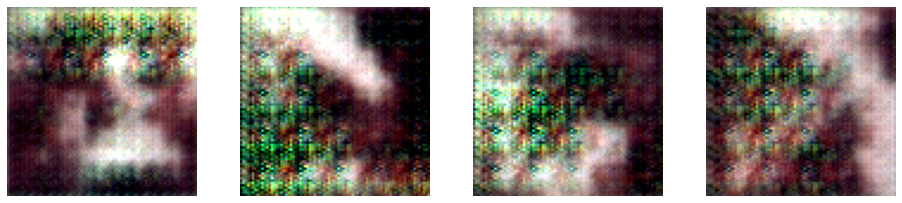

Time for epoch 1191 is 8.75282883644104 sec


In [ ]:
Gen_Loss,Dis_Loss=train(train_dataset,EPOCHS)

In [ ]:
epoch = range(EPOCHS)
plt.figure (figsize= (12,12))
plt.plot(epoch,Gen_Loss)
plt.plot(epoch,Dis_Loss)
plt.title('LOSS')
plt.xlabel('Epochs')
plt.legend(('Generator','Discriminator'))

In [ ]:
model = tf.keras.models.load_model('/content/gdrive/MyDrive/Apple5000')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


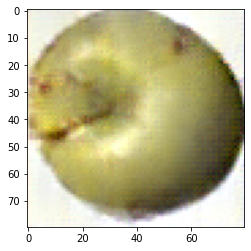

In [ ]:
predictions = model (tf.random.uniform ( [num_examples_to_generate, noise_dim]), training=False)
plt.imshow (np.array((predictions [0, :,:, :]*127.5 + 127.5), np. int32) ) 